In [4]:
# ================= use pyecharts to show interactive charts =============
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
from pyecharts import options as opts
from pyecharts.charts import Line
# ========================================================================
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'  #default font family
mpl.rcParams['mathtext.fontset'] = 'cm' #font for math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import pyswEOS
from pyswEOS import H2ONaCl
from pyswEOS import H2O
from pyswEOS import NaCl
water=H2O.cH2O()
sw=H2ONaCl.cH2ONaCl()
halite=NaCl.cNaCl()
figpath='.'
fmt_figs = ['jpg','svg','pdf']
path_echarts='../../manual/sphinx/source/Benchmarks/echarts/'

## Phase boundaries

### Critical curve of NaCl-H2O system

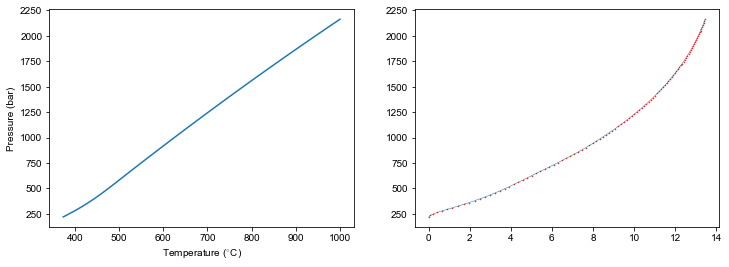

In [2]:
# calculate critical curve by giving temperature
T=np.linspace(H2O.T_Critic,H2ONaCl.TMAX_C,100)
p,x = sw.P_X_Critical(T)
x,p = np.array(x)*100,np.array(p)
# plot
fig, axes = plt.subplots(1,2,figsize=(12,4))

# in T-p space
ax=axes[0]
ax.plot(T,p)
ax.set_xlabel('Temperature ($^{\circ}$C)')
ax.set_ylabel('Pressure (bar)')

ax=axes[1]
ax.plot(x,p,marker='.',ms=1, mfc='r',mec='r',lw=0.5)

plt.savefig('CriticalCurve_H2ONaCl.pdf',bbox_inches='tight')

plt.show()

In [5]:
line = Line(init_opts=opts.InitOpts(width="800px", height="450px"))
line.add_xaxis(xaxis_data=T)
line.add_yaxis(series_name="Pressure", y_axis=p, color='blue', label_opts=opts.LabelOpts(is_show=False))
line.extend_axis(yaxis=opts.AxisOpts(name="Salinity (wt.% NaCl)",type_="value", min_=x.min(), max_=x.max(), axislabel_opts=opts.LabelOpts(formatter="{value}"),))
line.add_yaxis(series_name="Salinity", y_axis=x, color='red', yaxis_index=1, label_opts=opts.LabelOpts(is_show=False))

line.set_global_opts(tooltip_opts=opts.TooltipOpts(is_show=True, trigger="axis", axis_pointer_type="cross" ),
        yaxis_opts=opts.AxisOpts(
        name="Pressure (bar)",
        type_="value",
        axislabel_opts=opts.LabelOpts(formatter="{value}"),
        axistick_opts=opts.AxisTickOpts(is_show=True),
        splitline_opts=opts.SplitLineOpts(is_show=True),),
        xaxis_opts=opts.AxisOpts(name="Temperature (C)",min_=T.min(),max_=T.max()),
)
line.render('%s/criticalCruve_H2ONaCl.html'%(path_echarts))
line.load_javascript()


In [6]:
line.render_notebook()

In [7]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar()
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values())
    .add_yaxis("商家B", Faker.values())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Bar-显示 ToolBox"),
        toolbox_opts=opts.ToolboxOpts(),
        legend_opts=opts.LegendOpts(is_show=False),
    )
    .render('%s/%s'%(path_echarts, "bar_toolbox.html"))
)